In [1]:
import numpy as np
from bokeh.plotting import show
from soydata.data.clustering import make_circular_clusters
from soydata.visualize import scatterplot
from soydata.visualize import use_notebook

use_notebook()

X, labels = make_circular_clusters(n_clusters=10, r_min=0.05, r_max=0.15,
    equal_density=True, noise=0.05, seed=0, size_min=150, size_max=250)

data_indices = np.where(labels >= 0)[0]
noise_indices = np.where(labels == -1)[0]

p_data = scatterplot(X[data_indices], color='lightgrey', size=3, title='Data and noise', show_inline=False)
p_data = scatterplot(X[noise_indices], color='#2b83ba', p=p_data)

Loading BokehJS ...

In [2]:
from sklearn.ensemble import IsolationForest

isolation_forest = IsolationForest(n_estimators=100, bootstrap=False, random_state=0, verbose=1)
predicted = isolation_forest.fit_predict(X)

predicted_data_indices = np.where(predicted >= 0)[0]
predicted_noise_indices = np.where(predicted == -1)[0]

p = scatterplot(X[predicted_data_indices], color='lightgrey',
    size=3, title='Outlier detection', show_inline=False)
p = scatterplot(X[predicted_noise_indices], color='#2b83ba', p=p)

/home/lovit/anaconda3/envs/pytorch/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:237: FutureWarning:

default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.

/home/lovit/anaconda3/envs/pytorch/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:247: FutureWarning:

behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
/home/lovit/anaconda3/envs/pytorch/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:415: DeprecationWarning:

threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.



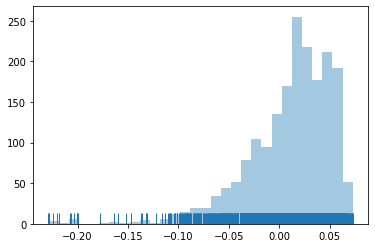

In [3]:
%matplotlib inline
import seaborn as sns

anomaly_score = isolation_forest.decision_function(X)
sns.distplot(anomaly_score, bins=30, kde=False, rug=True)

In [4]:
from bokeh.layouts import gridplot


figures = []
for threshold in [-0.2, -0.15, -0.1, -0.07, -0.05]:

    custom_data_indices = np.where(anomaly_score >= threshold)[0]
    custom_noise_indices = np.where(anomaly_score < threshold)[0]

    title = f'Isolation Forest (threshold={threshold})'
    p = scatterplot(X[custom_data_indices], color='lightgrey',
        size=3, title=title, width=400, height=400, show_inline=False)
    p = scatterplot(X[custom_noise_indices], color='#2b83ba', p=p, show_inline=False)
    figures.append(p)


p_data.width = 400
p_data.height = 400
figures.insert(0, p_data)

grid = [figures[:3], figures[3:]]
gp_custom_if = gridplot(grid)
show(gp_custom_if)